<a href="https://colab.research.google.com/github/arpit1729/ma22c007_2023_PL/blob/main/Assignments/Assignment_8/Singular_value_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [3]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [4]:
u @ u.T.conjugate() # u is unitary. Its columns are left singular vectors

array([[ 1.+0.j, -0.-0.j, -0.+0.j, -0.-0.j],
       [-0.+0.j,  1.+0.j,  0.-0.j,  0.+0.j],
       [-0.-0.j,  0.+0.j,  1.+0.j,  0.-0.j],
       [-0.+0.j,  0.-0.j,  0.+0.j,  1.+0.j]])

In [5]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j, -0.-0.j, -0.+0.j, -0.+0.j, -0.-0.j],
       [-0.+0.j,  1.+0.j, -0.+0.j, -0.-0.j,  0.-0.j],
       [-0.-0.j, -0.-0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [-0.-0.j, -0.+0.j,  0.-0.j,  1.+0.j, -0.+0.j],
       [-0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j,  1.+0.j]])

In [6]:
s # Only the diagonal entries of Sigma are returned in s

array([3.691, 0.876, 0.596, 0.421])

In [7]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [8]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.143,  0.156,  0.23 ,  0.181,  0.24 ],
       [ 0.045,  0.049,  0.073,  0.057,  0.076],
       [ 0.216,  0.235,  0.348,  0.274,  0.362],
       [-0.198, -0.216, -0.32 , -0.252, -0.333]])

In [9]:
np.outer(u[0, :], vh[0, :])

array([[ 0.143,  0.156,  0.23 ,  0.181,  0.24 ],
       [ 0.045,  0.049,  0.073,  0.057,  0.076],
       [ 0.216,  0.235,  0.348,  0.274,  0.362],
       [-0.198, -0.216, -0.32 , -0.252, -0.333]])

In [10]:
ar = np.zeros_like(a)
for i in range(4):
    ar += np.outer(u[:, i], s[i] * vh[i, :])

In [11]:
a - ar # a and ar are identical

array([[-0., -0.,  0., -0., -0.],
       [-0., -0.,  0., -0., -0.],
       [-0., -0., -0., -0., -0.],
       [ 0., -0., -0., -0., -0.]])

In [12]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

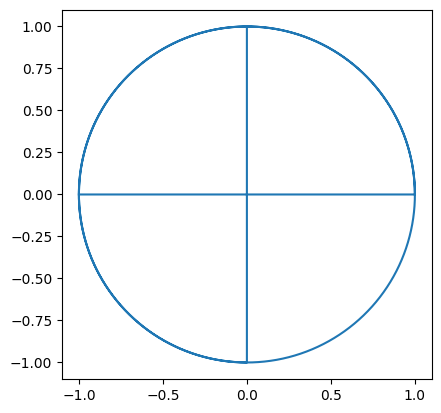

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
    plt.plot(c[0, :], c[1, :])
    plt.axis('image');
# plot the unit circle and axis segments:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
np.concatenate([z, np.sin(t), l])])

show(c)

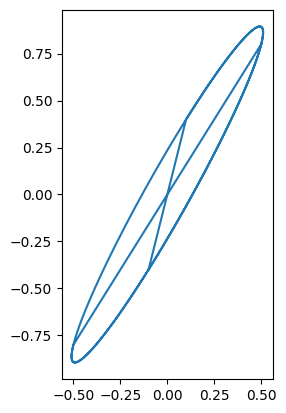

In [14]:
show(a @ c)

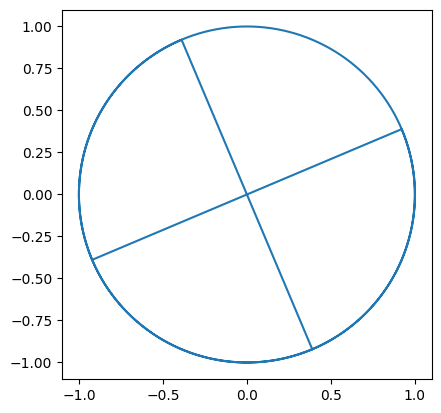

In [15]:
show(vh @ c)

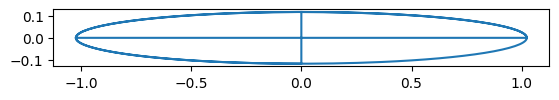

In [16]:
show(np.diag(s) @ c)

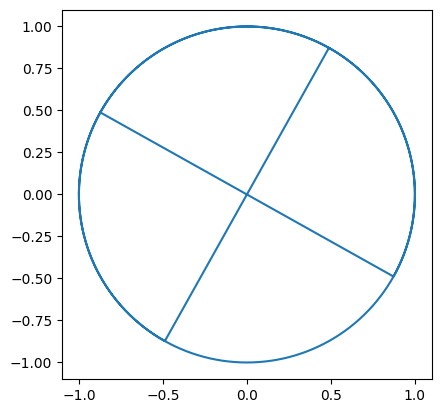

In [17]:
show(u @ c)

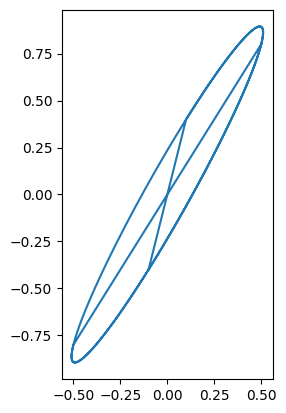

In [18]:
show(u @ np.diag(s) @ vh @ c)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
cats = plt.imread('/content/download.jpeg')
cats.shape#checks and prints the shape of the 'cats' image

(118, 164, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

17971.417139446738

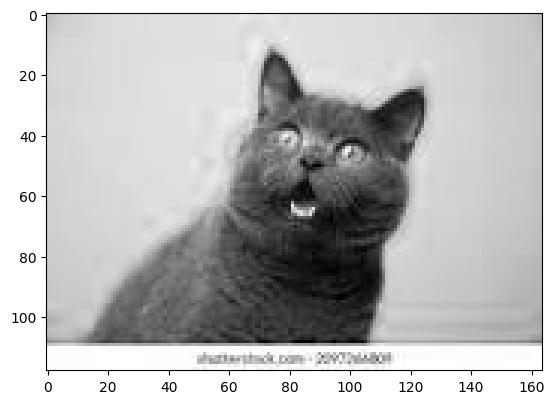

In [28]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [29]:
u, s, vh = svd(c)

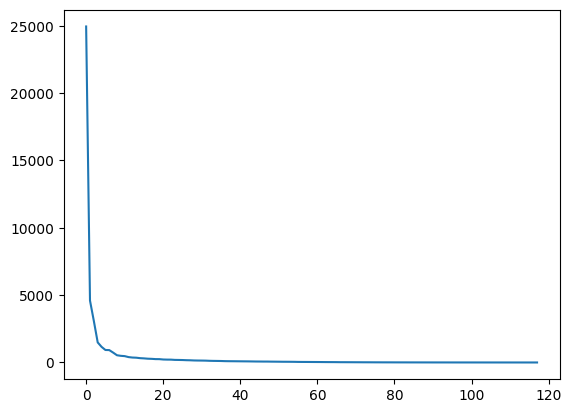

In [30]:
plt.plot(s);

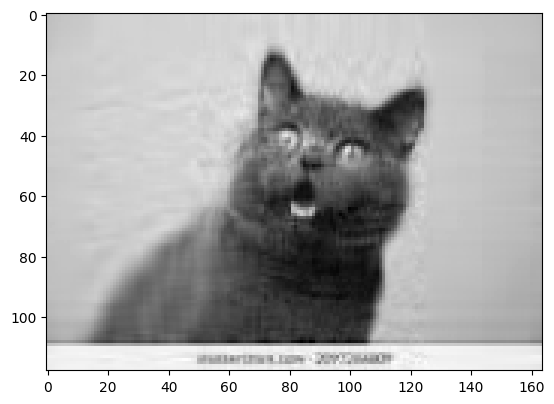

In [31]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

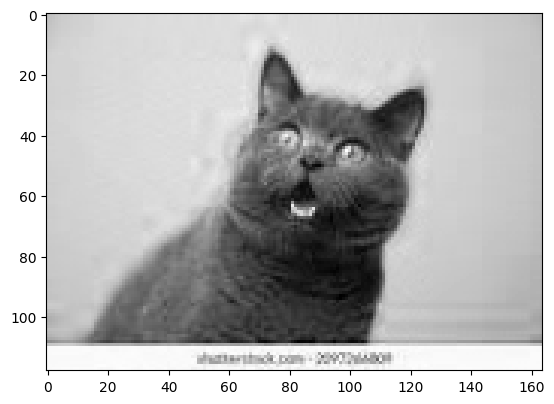

In [32]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [33]:
relative_error = 1.e-1

In [34]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

4

In [35]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [36]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09370968168495313

In [37]:
u.shape[0] * l + l + l * vh.shape[0]

1132

In [38]:
c.shape[0] * c.shape[1]

19352